# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
### Dataset Description 

**This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.**


● PatientId ---> Is an identification number for each patient<br>
● ScheduledDay ---> tells us on what day the patient set up their appointment.<br>
● Neighborhood ---> indicates the location of the hospital.<br>
● Scholarship ---> indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br><br>
● ***please note***<br>
>‘No_show’ it says ‘No’ if the patient attanded his appointment, and ‘Yes’ if they did not attend.



>in these sections ('Scholarship' -	'Hipertension' -	'Diabetes'	- 'Alcoholism' -	'Handcap')
>>'1' means True<br>
>>'0'means False<br>


### Question(s) for Analysis
1- what is the percentage of overall show vs percentage of no-show ?<br>
2- What is the predominant gender among patients? <br>
3- Which gender has higher Percentage of attendance?<br>
4- Do patients who receive SMS have a higher rate of no show <br>
5- Does the period between scheduling and appointment day affect the rates of no-show?<br>
6- Which day of the week receives more appointments? And which has the highest no-show rate?<br>
7- Which day has the highest no-show rate?<br>
8- Is there any correlation between scholarship and no-show rate ?<br>
9- does the Age effect the No-show rate ?

***

#### Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading file


In [2]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### General Properties

In [3]:
#check the first 5 rows in the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check the last 5 rows in the dataframe
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#checking the shape of the dataframe
shape =df.shape
shape

(110527, 14)

In [6]:
#general information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#checking for missing data
null =df.isnull().sum()
null

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#checking for duplication
duplication = df.duplicated().sum()
duplication

0

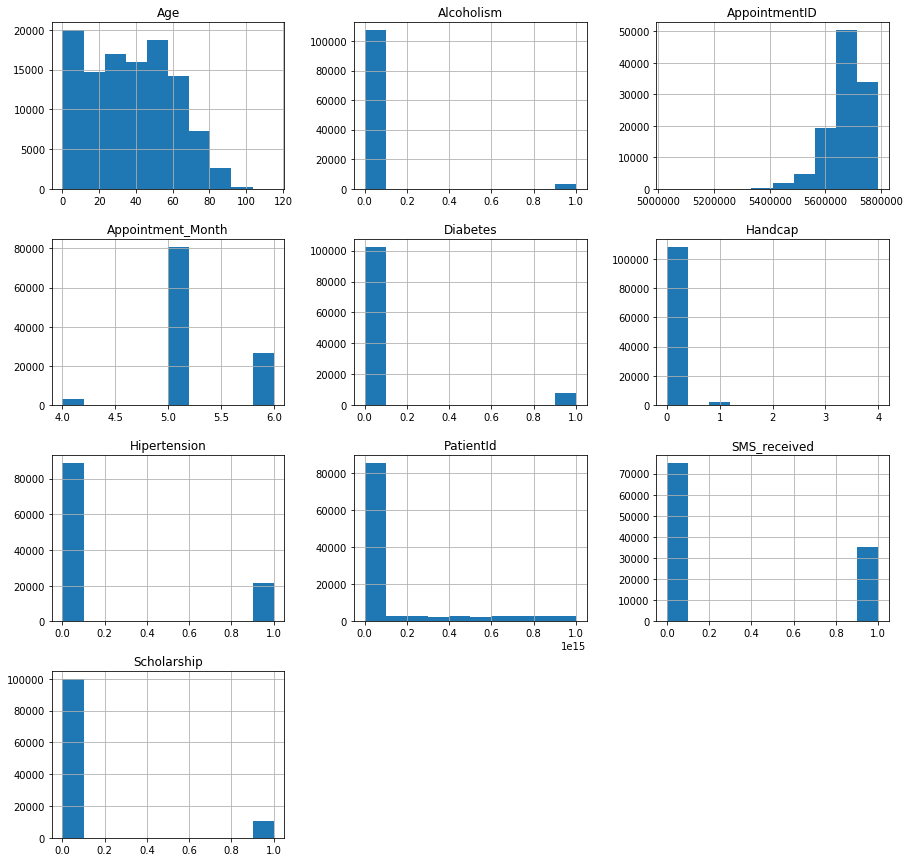

In [103]:
df.hist(figsize=(15,15));

In [9]:
#general statistical describtion for the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
#defining function to draw histograms
def draw_hist (df,column_name):
     df[column_name].plot(kind = 'hist', title = 'distribution of patients number by {}'.format(column_name));      

In [11]:
#defining function to draw barchart
def bar_chart(No_of_locations ,values,labels, title_bar):

    plt.bar(range(No_of_locations),values, tick_label=labels)
    plt.title(title_bar)

In [12]:
def pie_plot(df, list_labels, title_pie):
    (df.value_counts(normalize=True) * 100).plot.pie(autopct='%1.0f%%', labels=list_labels)
    plt.title(title_pie);

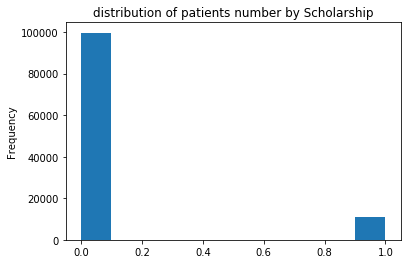

In [13]:
draw_hist (df,'Scholarship')

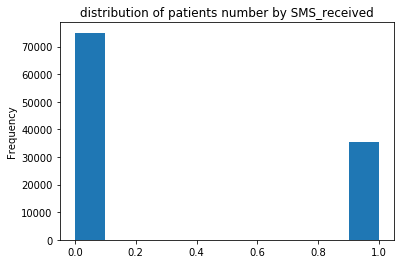

In [14]:
draw_hist (df,'SMS_received')

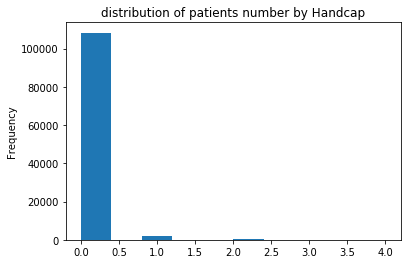

In [15]:
draw_hist (df,'Handcap')

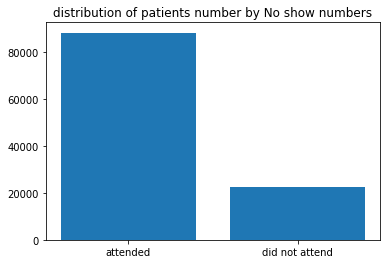

In [16]:
No_show_histo = df.groupby('No-show')['No-show'].count();
labels = ['attended','did not attend']
title_bar = 'distribution of patients number by No show numbers'
bar_chart(2 ,No_show_histo,labels, title_bar)

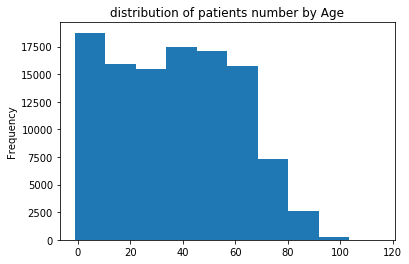

In [17]:
draw_hist (df,'Age')

> During checking the attributies we noticed that there is an unlogical data in 'Age' column in which there are a huge amount of Age input equal or less than 0 which is unlogic

In [18]:
Age_issue = df.query('Age < 0')['Age'].count()
'number of data below or 0 is {}'. format(Age_issue)

'number of data below or 0 is 1'

***

##### To summarize General Properties

In [19]:
print('The dataframe has:-\n               {} rows ,{} columns \n               {}  duplicated values \n               {} NAN values.\nHowever we found that there is {} Age entries less than \'0\' which is not logic.\nwe also found that the \'ScheduledDay\' and \'AppointmentDay\' columns not in the datetime type\nIn the next step we are going to fix those issues.'. format(shape[0],shape[1],duplication,null.sum(),Age_issue))



The dataframe has:-
               110527 rows ,14 columns 
               0  duplicated values 
               0 NAN values.
However we found that there is 1 Age entries less than '0' which is not logic.
we also found that the 'ScheduledDay' and 'AppointmentDay' columns not in the datetime type
In the next step we are going to fix those issues.


***


### Data Cleaning
#### First
- we mentioned above that there is an issue with age column, in the next section we will fill those unlogical data with the average age
 
1- First we get the average values of Ages without 0 and less values

In [20]:
Average_age = df[df['Age'] > 0]['Age'].mean().round(2)

2- then we fill the issue data cells with this average

In [21]:
issue_data_index= list(df[df['Age'] < 0]['Age'].index.values)

In [22]:
df.iloc[issue_data_index,5] = Average_age

3- Confirming that there are no longer Ages equal to 0 or less

In [23]:
df.query('Age < 0')['Age'].count()

0

#### Second

We are going to convert 'ScheduledDay' and 'AppointmentDay' columns to datetime data,<br>
And as long as 'AppointmentDay' not specifing the time, we will exclude time from both columns<br>
Also , we will add 2 columns 1 for month number and one for day name

In [24]:
#converting 'ScheduledDay' & 'AppointmentDay' to date and excluding time from both columns
df_to_date_time = df.copy()
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['Appointment_Month'] = pd.to_datetime(df['AppointmentDay']).dt.month
df['Appointment_day'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name

In [25]:
#confirming the changes
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Month,Appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday


While checking the data we found that there are 5 unlogical entries , in which the appointment day is prior the Scheduled day, so we will drop them from data frame

In [26]:
unlogical_data = df[df['ScheduledDay'] > df['AppointmentDay']]
unlogical_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Month,Appointment_day
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38.0,RESISTÊNCIA,0,0,0,0,1,0,Yes,5,Monday
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19.0,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,5,Tuesday
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22.0,CONSOLAÇÃO,0,0,0,0,0,0,Yes,5,Wednesday
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81.0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,5,Thursday
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7.0,TABUAZEIRO,0,0,0,0,0,0,Yes,5,Tuesday


In [27]:
#removing unlogical data
df_new = df.copy()
df_new.drop(list(unlogical_data.index.values), inplace=True)

In [28]:
#confirming the removing step
df_new[df_new['ScheduledDay'] > df_new['AppointmentDay']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Month,Appointment_day


#### Third
preparing Period column to calculate the time between ScheduledDay and AppointmentDay

In [29]:
df_new['waiting_Period'] = (df_new['AppointmentDay']-  df_new['ScheduledDay']).dt.days

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### 1- what is the percentage of overall show vs percentage of no-show ?

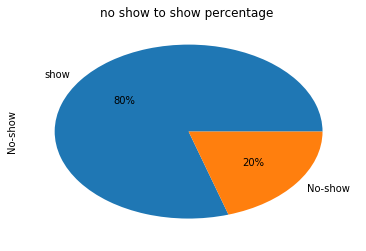

In [98]:
df0 = df_new['No-show']
list_labels = ['show' , 'No-show']
title_pie = 'no show to show percentage '
pie_plot(df0, list_labels, title_pie)

**overall, 20% of all the patients missed thier appointments**
### 2- What is the predominant gender among patients?

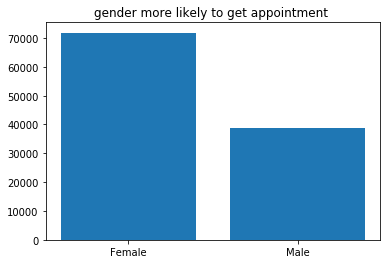

In [31]:
Gender_values= df_new['Gender'].value_counts()
labels = ['Female','Male']
bar_chart (2,Gender_values,labels,'gender more likely to get appointment ')

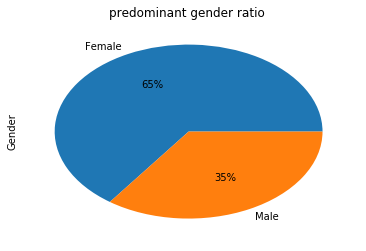

In [99]:
df1 = df_new['Gender']
list_labels = ['Female' , 'Male']
title_pie = 'predominant gender ratio '
pie_plot(df1, list_labels, title_pie)

**65% of the Patients are Female**

### 3- Which gender has higher Percentage of attendance ?

<br> ***Note:*** attending means ---- >  'No-show' = 'No'

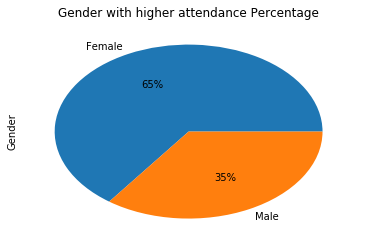

In [33]:
df2 = df_new[df_new['No-show']== 'No']['Gender']
list_labels = ['Female' , 'Male']
title_pie = 'Gender with higher attendance Percentage'
pie_plot(df2, list_labels, title_pie)

**Women has higher attendence rate**

### 4- Do patients who receive SMS have a higher rate of no show ? 
this measures the effect of sending text messages-

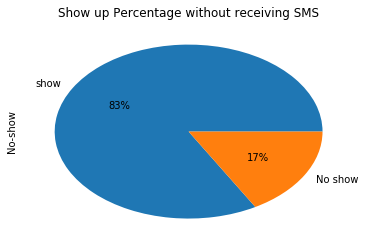

In [34]:
df2 = df_new[df_new['SMS_received'] == 0]['No-show']
list_labels = ['show' , 'No show']
title_pie = 'Show up Percentage without receiving SMS'
pie_plot(df2, list_labels, title_pie)

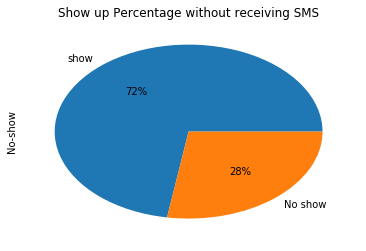

In [35]:
df3 = df_new[df_new['SMS_received'] > 0]['No-show']
list_labels = ['show' , 'No show']
title_pie = 'Show up Percentage without receiving SMS'
pie_plot(df3, list_labels, title_pie)

**Patients who received text messages have a higher probability to miss their appointment than patients who did not receive**
### 5-  Does the period between scheduling and appointment day affect the rates of no-show?

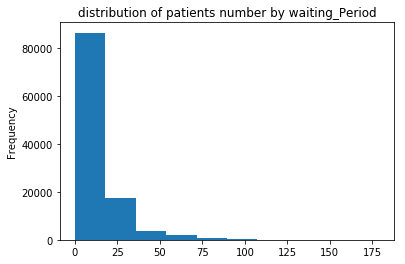

In [36]:
draw_hist (df_new,'waiting_Period')

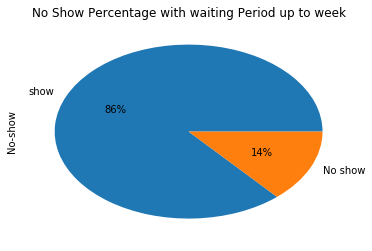

In [37]:
df4 = df_new[df_new['waiting_Period'] <= 7]['No-show']
list_labels = ['show' , 'No show']
title_pie = 'No Show Percentage with waiting Period up to week'
pie_plot(df4, list_labels, title_pie)

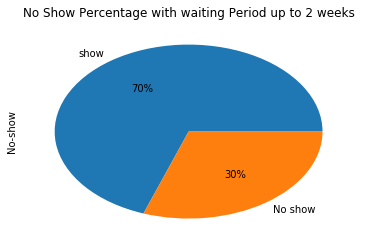

In [75]:
df4_2 = df_new[(df_new['waiting_Period'] >7) & (df_new['waiting_Period'] <=14) ]['No-show']
list_labels = ['show' , 'No show']
title_pie = 'No Show Percentage with waiting Period up to 2 weeks'
pie_plot(df4_2, list_labels, title_pie)

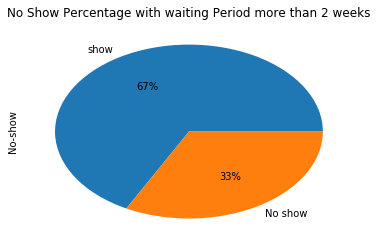

In [39]:
df4_3 = df_new[df_new['waiting_Period'] >14 ]['No-show']
list_labels = ['show' , 'No show']
title_pie = 'No Show Percentage with waiting Period more than 2 weeks'
pie_plot(df4_3, list_labels, title_pie)

**The longer the waiting period, the higher the No-show rate**
### 6-  Which day of the week receives more appointments? And which has the highest no-show rate?

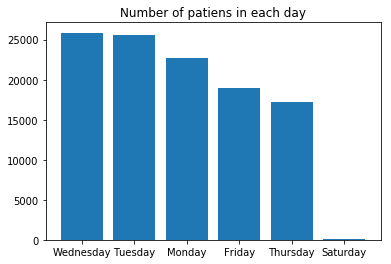

In [54]:
df6 = df_new['Appointment_day'].value_counts()
bar_chart(df6.count(),df6,df6.index.values,'Number of patiens in each day')

**The most besiest day week is Wednesday**
### 7-  Which day has the highest no-show rate?

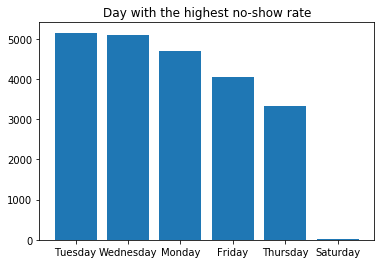

In [100]:
df7 = df_new[df_new['No-show'] == 'Yes']
df7 = df7['Appointment_day'].value_counts()
bar_chart(df7.count(),df7,df7.index.values,'Day with the highest no-show rate')

**Tuesday has the highest no-show rate**
### 8- Is there any correlation between scholarship and no-show rate ?

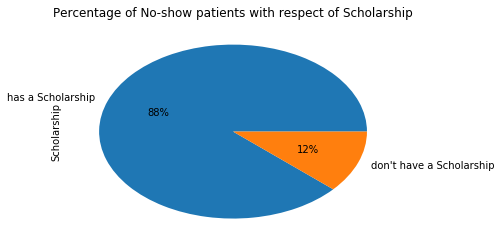

In [78]:
df8 = df_new[df_new['No-show'] == 'Yes']['Scholarship']
list_labels = ['has a Scholarship' , 'don\'t have a Scholarship']
title_pie = 'Percentage of No-show patients with respect of Scholarship'
pie_plot(df8, list_labels, title_pie)

**Patients with scholarship are more likely to miss thier appointment**
### 9- does the Age effect the No-show rate ?

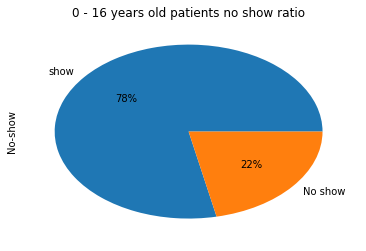

In [95]:
df9_2 = df_new[df_new['Age'] <= 16]['No-show']
list_labels = ['show' , 'No show']
title_pie = '0 - 16 years old patients no show ratio'
pie_plot(df9_2, list_labels, title_pie)

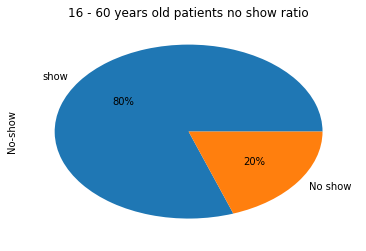

In [96]:
df9 = df_new[(df_new['Age'] >16) & (df_new['waiting_Period'] <=60) ]['No-show']
list_labels = ['show' , 'No show']
title_pie = '16 - 60 years old patients no show ratio'
pie_plot(df9, list_labels, title_pie)

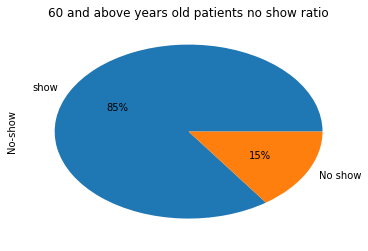

In [97]:
df9_3 = df_new[df_new['Age'] > 60]['No-show']
list_labels = ['show' , 'No show']
title_pie = '60 and above years old patients no show ratio'
pie_plot(df9_3, list_labels, title_pie)

**Patients with Ages less than 16 are more likely to miss thier appointments**

In [140]:
df_new[df_new['Appointment_Month'] == 4]['AppointmentDay'].value_counts()

2016-04-29    3235
Name: AppointmentDay, dtype: int64

<a id='conclusions'></a>
## Conclusions

To summurise
> 1- 65% of the Patients are Female<br>
> 2- overall, 20% of all the patients missed thier appointments most of them are men. Where, Women has higher attendence rate with 65%<br>
> 3- Patients who received text messages have a higher probability to miss their appointment than patients who did not.<br>
> 4- waiting time - *time between scheduling and appointment* - affect No show rate , where **The longer the waiting period, the higher the No-show rate** <br>
>5- The most besiest day week is Wednesday.<br>
>6- Tuesday has the highest no-show  rate.<br>
>7- Patients with scholarship are more likely to miss thier appointment.<br>
>8- Patients with Ages less than 16 are more likely to miss thier appointments.<br>


### Limitations

1- The data of appointments is for very short time of period 1 day in April and 8 days in June 
so we cannot compare beteen months.

2- categorical data make it very hard to correlate between data

3- There are some UnlogicAL data such as patients with less than 0

4- Also Patiens with Age equal to zero is not logic but we treated THEM as a babies with few month years old 




## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0